In [1]:
import numpy as np
import matplotlib.pyplot as pl

## The correct implementation

In [2]:
def fft_calc(f0, spindown, psi0, srate, final_time, endpoint=False):
    omega0 = f0*2*np.pi
    t_range = np.linspace(0,final_time,srate*final_time, endpoint = False)
    psi = 2*np.pi*(spindown/2) * t_range**2 + omega0 * t_range + psi0
    signal = np.cos(psi)
    
    freqs = np.fft.fftshift(np.fft.fftfreq(len(t_range), d=t_range[1]-t_range[0]))
    fft = np.fft.fftshift(np.fft.fft(signal))
    return t_range, signal, freqs, fft

In [3]:
t_range0, signal0, freqs0, fft0 = fft_calc(16.0, 0, 0, 512, 2**14)

(0.9, 1.1)

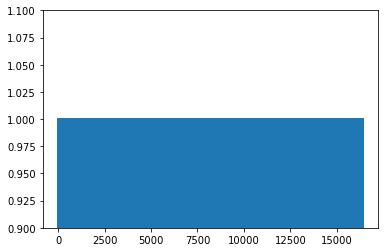

In [5]:
pl.plot(t_range0, signal0)
pl.ylim(0.9, 1.1)
#pl.xlim(0,1)

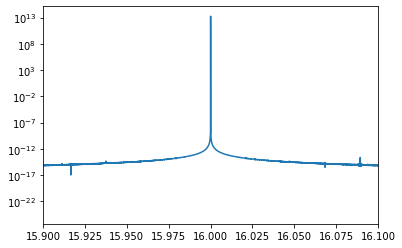

In [6]:
pl.plot(freqs0, abs(fft0)**2)
pl.xlim(15.9, 16.1)
# pl.xlim(fmin - window_width/2, fmax + window_width/2)
pl.yscale('log')
# pl.axvline(fmin, c = 'r', ls = '--')
# pl.axvline(fmax, c = 'r', ls = '--')

## if the number of points is not 2^n, it is much slower

In [9]:
%timeit fft_calc(16.0, 0, 0, 513, 2**14)
%timeit fft_calc(16.0, 0, 0, 512, 2**14)

650 ms ± 6.77 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
544 ms ± 6.62 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## If the total time is not large enough

In [10]:
t_range1, signal1, freqs1, fft1 = fft_calc(16.0, 0, 0, 512, 2**)

(15.9, 16.1)

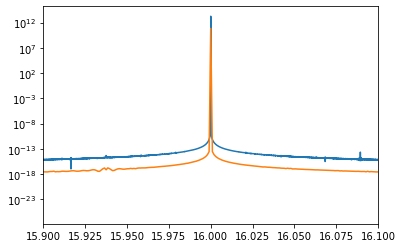

In [12]:
pl.semilogy(freqs0, abs(fft0)**2)
pl.semilogy(freqs1, abs(fft1)**2)
pl.xlim(15.9, 16.1)
# pl.xlim(fmin - window_width/2, fmax + window_width/2)

In [ ]:
pl.plot(t_range1, signal1)
pl.ylim(0.9, 1.1)
#pl.xlim(0,1)

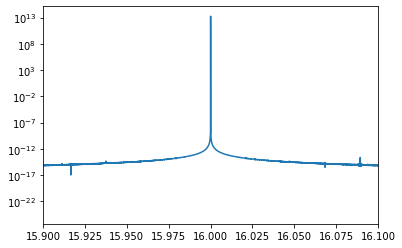

In [44]:
pl.plot(freqs0, abs(fft0)**2)
pl.xlim(15.9, 16.1)
# pl.xlim(fmin - window_width/2, fmax + window_width/2)
pl.yscale('log')
# pl.axvline(fmin, c = 'r', ls = '--')
# pl.axvline(fmax, c = 'r', ls = '--')

In [29]:
freqs0[1] -freqs0[0]


6.103515625e-05

In [9]:
t_range1 = np.linspace(0,10,10000)
psi1 = spindown/2 * t_range1**2 + omega0 * t_range1 + psi0
signal1 = np.cos(2*np.pi*psi1)
freqs1 = np.fft.fftfreq(len(t_range1), d=t_range1[1]-t_range1[0])
fft1 = np.fft.fft(signal1)

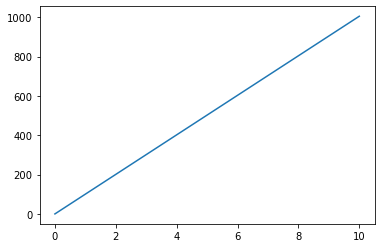

In [10]:
pl.plot(t_range1, psi1)

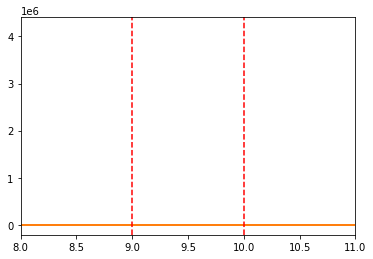

In [11]:
pl.plot(freqs0, abs(fft0))
pl.plot(freqs1, abs(fft1))
pl.xlim(8, 11)
pl.axvline(10, c = 'r', ls = '--')
pl.axvline(9, c = 'r', ls = '--')

## Naive case

In [25]:
f0 = 10
omega0 = f0*2*np.pi
psi0 = 0
spindown = -0.1
srate = 1000
final_time = 10
t_range = np.linspace(0,final_time,srate*final_time, endpoint = False)
psi = 2*np.pi*(spindown/2) * t_range**2 + omega0 * t_range + psi0
f = spindown * t_range + f0

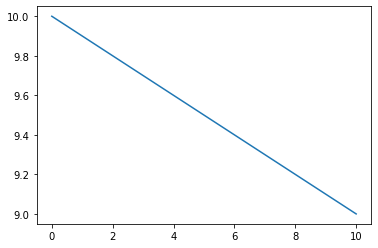

In [26]:
pl.plot(t_range, f)
fmin = min(f)
fmax = max(f)

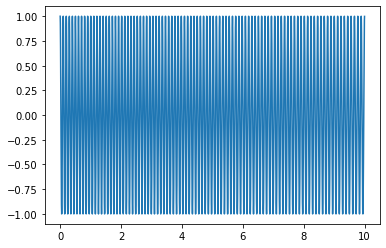

In [27]:
signal = np.cos(psi)
pl.plot(t_range, signal)
#pl.xlim(0,1)

In [28]:
freqs0 = np.fft.fftshift(np.fft.fftfreq(len(t_range), d=t_range[1]-t_range[0]))
fft0 = np.fft.fftshift(np.fft.fft(signal))

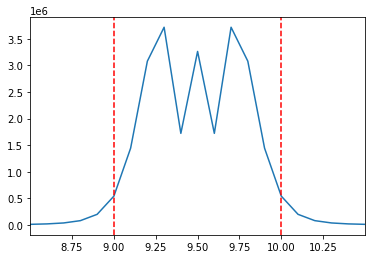

In [30]:
window_width = fmax-fmin
pl.plot(freqs0, abs(fft0)**2)
pl.xlim(fmin - window_width/2, fmax + window_width/2)
# pl.yscale('log')
pl.axvline(fmin, c = 'r', ls = '--')
pl.axvline(fmax, c = 'r', ls = '--')

Here we see both leakage outside the frequency we expect, and also jaggedness inside

These appear both due to numerical instabilities and analytical reasons

In [17]:
f0 = 16.001
f1 = 16
omega0 = f0*2*np.pi
omega1 = f1*2*np.pi
psi0 = 0
spindown = 0 #-1e-8
srate = 512
final_time = 2**14
t_range = np.linspace(0,final_time,srate*final_time, endpoint = False)
psi = 2*np.pi*(spindown/2) * t_range**2 + omega0 * t_range + psi0
f = spindown * t_range + f0

signal0 = np.cos(psi)
window_width = fmax-fmin

In [18]:
freqs0 = np.fft.fftshift(np.fft.fftfreq(len(t_range), d=t_range[1]-t_range[0]))
fft0 = np.fft.fftshift(np.fft.fft(signal))

ValueError: x and y must have same first dimension, but have shapes (8388608,) and (10000,)

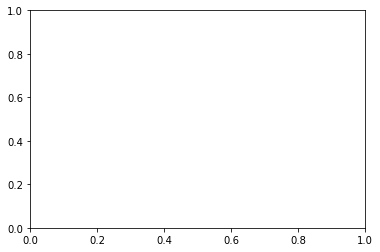

In [19]:
pl.plot(freqs0, abs(fft0)**2)
pl.xlim(15.9, 16.1)
# pl.xlim(fmin - window_width/2, fmax + window_width/2)
pl.yscale('log')
# pl.axvline(fmin, c = 'r', ls = '--')
# pl.axvline(fmax, c = 'r', ls = '--')

Estimating the number of number of bins contaminated by spectral leakage is analytically possible but very expensive. It is very hard to estimate the phase, even in the limit of infinite SNR is is NP hard. With noise it is very difficult.

In [ ]:
# Affects computation time as well - do timeit for 2^n and 2^n+1

In [ ]:
# Why need fftshift instead of imposing time
# Why need length to be power of 2, divide and conquer
# Why need long time window otherwise periodic functions are a poor basis / representation for the function

## 